## W.2 Wrangle Claims_ID

### Table of Contents

1. <a href= "#1.-Observations-&-Goals">Observations & Goals</a>
2. <a href= "#2.-Python-Libraries-&-Tools">Python Libraries & Tools</a>
3. <a href= "#3.-Notebook-Settings">Notebook Settings</a>
4. <a href= "#4.-Data-Source">Data Source</a>
5. <a href='#5.-Find-Unique-Claim-ID-and-Assign-New-ID'>Find Unique Claim ID and Assign New ID</a>
6. <a href='#6.-Create-Dictionary-to-Map-Old-to-New-Claim-ID'>Create Dictionary to Map Old to New Claim ID</a>
7. <a href='#7.-Replace-Old-with-New-Claim-ID'>Replace Old with New Claim ID</a>
8. <a href='#8.-Analytics'>Analytics</a>

### 1. Observations & Goals

Observation: Medical Claim IDs are used to control claims submitted by providers.  The ID structure stored in the database has changed over the years.  A claim is normally submitted by a provider and includes 1 or more line items per member.

Goal: Standardize and assign random claim IDs.

### 2. Python Libraries & Tools

In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker    

from IPython import display

from pivottablejs import pivot_ui
import ipypivot as pt

# pd.read_clipboard()

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 3. Notebook Settings

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.width

pd.options.display.float_format = '{:,.0f}'.format


import winsound
duration = 1300
freq = 440


1000

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 4. Data Source

In [9]:
df = pd.read_pickle('DataFiles/AnnualpickleApr28')
winsound.Beep(freq,duration)

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 5. Find Unique Claim ID and Assign New ID

In [5]:
# PURPOSE: Existing Claim_IDs do not have uniform structure.  Identify unique Claim_ID and create Excel file for Random Number generation and assignment.

Claim_Old_ID = df.Claim_ID.value_counts()
Claim_Old_ID.to_excel('DataFiles\Claims_ID_ReNum.xlsx',index=True)

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 6. Create Dictionary to Map Old to New Claim ID


In [6]:
# PURPOSE: Import Excel file with New Claim Random Numbers.  Set Claim ID to dtype = int to increase mapping speed
# when processing Dictionary in Step 3.

Excel_Dict_Claims_Map = pd.ExcelFile('DataFiles\Claims_ID_ReNum_ToDataframe.xlsx')

Dict_Claims_Map = Excel_Dict_Claims_Map.set_index('OLD').to_dict()['NEW']


[<a href='#Table-of-Contents'>Table of Contents</a>]

### 7. Replace Old with New Claim ID

In [18]:
# PURPOSE: Replace Old Claim_ID to New Claim_ID

df.replace({'Claim_ID':Claims_Dict_Map}, inplace = True)

winsound.Beep(freq,duration)

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 8. Analytics

In [84]:
dfp = df.loc[df.Charge_Paid > 0]

#### Claims and Line Items Processed

In [40]:

claim_count = dfp.Claim_ID.nunique()
claim_countf = '{:,.0f}'.format(claim_count)

claim_line_count = dfp.Claim_Line_Item.count()
claim_line_countf = '{:,.0f}'.format(claim_line_count)

f"The Total Number of Claims during the Year was {claim_countf}"
f"The Total Number of Line Items Claimed during the Year was {claim_line_countf}"

'The Total Number of Claims during the Year was 65,015'

'The Total Number of Line Items Claimed during the Year was 148,730'

#### Claims Charged, Allowed and Paid

In [35]:

charge = dfp.Charge.sum()
chargef = '${:,.0f}'.format(charge)

charge_allowed = dfp.Charge_Allowed.sum()
charge_allowedf = '${:,.0f}'.format(charge_allowed)

charge_paid = dfp.Charge_Paid.sum()
charge_paidf = '${:,.0f}'.format(charge_paid)

f"The Total Claims Charged was {chargef}."
f"The Total Claims Allowed was {charge_allowedf}."
f"The Total Claims Paid was {charge_paidf}."

'The Total Claims Charged was $103,126,259.'

'The Total Claims Allowed was $37,350,128.'

'The Total Claims Paid was $33,818,426.'

#### Claims Count Processed by Month

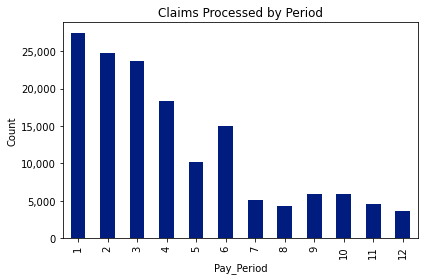

In [121]:

formatter = '{x:,.0f}'

dfp.groupby("Pay_Period").Claim_ID.count().plot.bar()


plt.title('Claims Processed by Period')
plt.ylabel('Count')
plt.gca().yaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.show();

In [124]:
claimid_count = dfp.Claim_ID.value_counts()


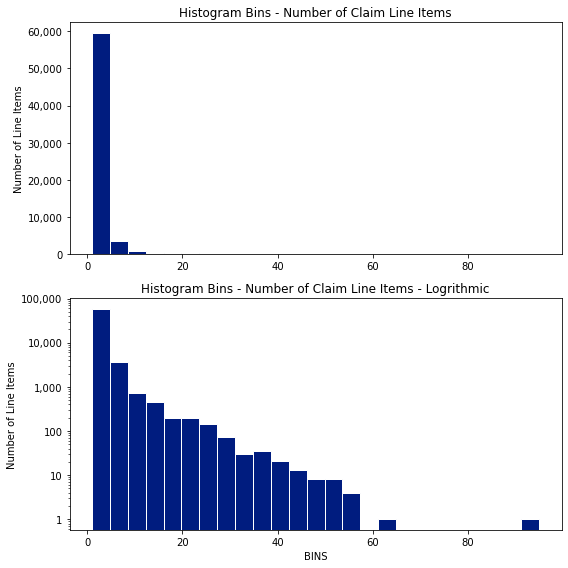

In [129]:
# dfp.Claim_ID.value_counts().plot.hist()
formatter = '{x:,.0f}'

plt.style.use('seaborn-dark-palette')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))


ax1.hist(claimid_count, bins=25, edgecolor='w')
ax2.hist(claimid_count, bins=25, log=True, edgecolor='w')


ax1.set_title('Histogram Bins - Number of Claim Line Items')
# ax1.set_xlabel('Bin')
ax1.set_ylabel('Number of Line Items')
ax1.yaxis.set_major_formatter(formatter)

ax2.set_title('Histogram Bins - Number of Claim Line Items - Logrithmic')
ax2.set_xlabel('BINS')
ax2.set_ylabel('Number of Line Items')
ax2.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show();

[<a href='#Table-of-Contents'>Table of Contents</a>]

In [41]:
# df.to_pickle('DataFiles/AnnualpickleApr28claim')
winsound.Beep(freq,duration)